#  Heart Disease Prediction

##  Introduction

Heart disease remains one of the leading causes of death worldwide. Early prediction based on clinical data can lead to better management and preventive measures. This project aims to predict the presence of heart disease using patient data containing features such as age, chest pain type, cholesterol, and maximum heart rate. The goal is to identify the key contributing factors and build an accurate predictive model.

---

##  Research Question

**Can we accurately predict the presence of heart disease based on clinical attributes such as age, cholesterol level, chest pain type, and maximum heart rate?**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

# Load dataset
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##  Data Overview and Cleaning

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##  Exploratory Data Analysis

In [8]:
# Basic statistics
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


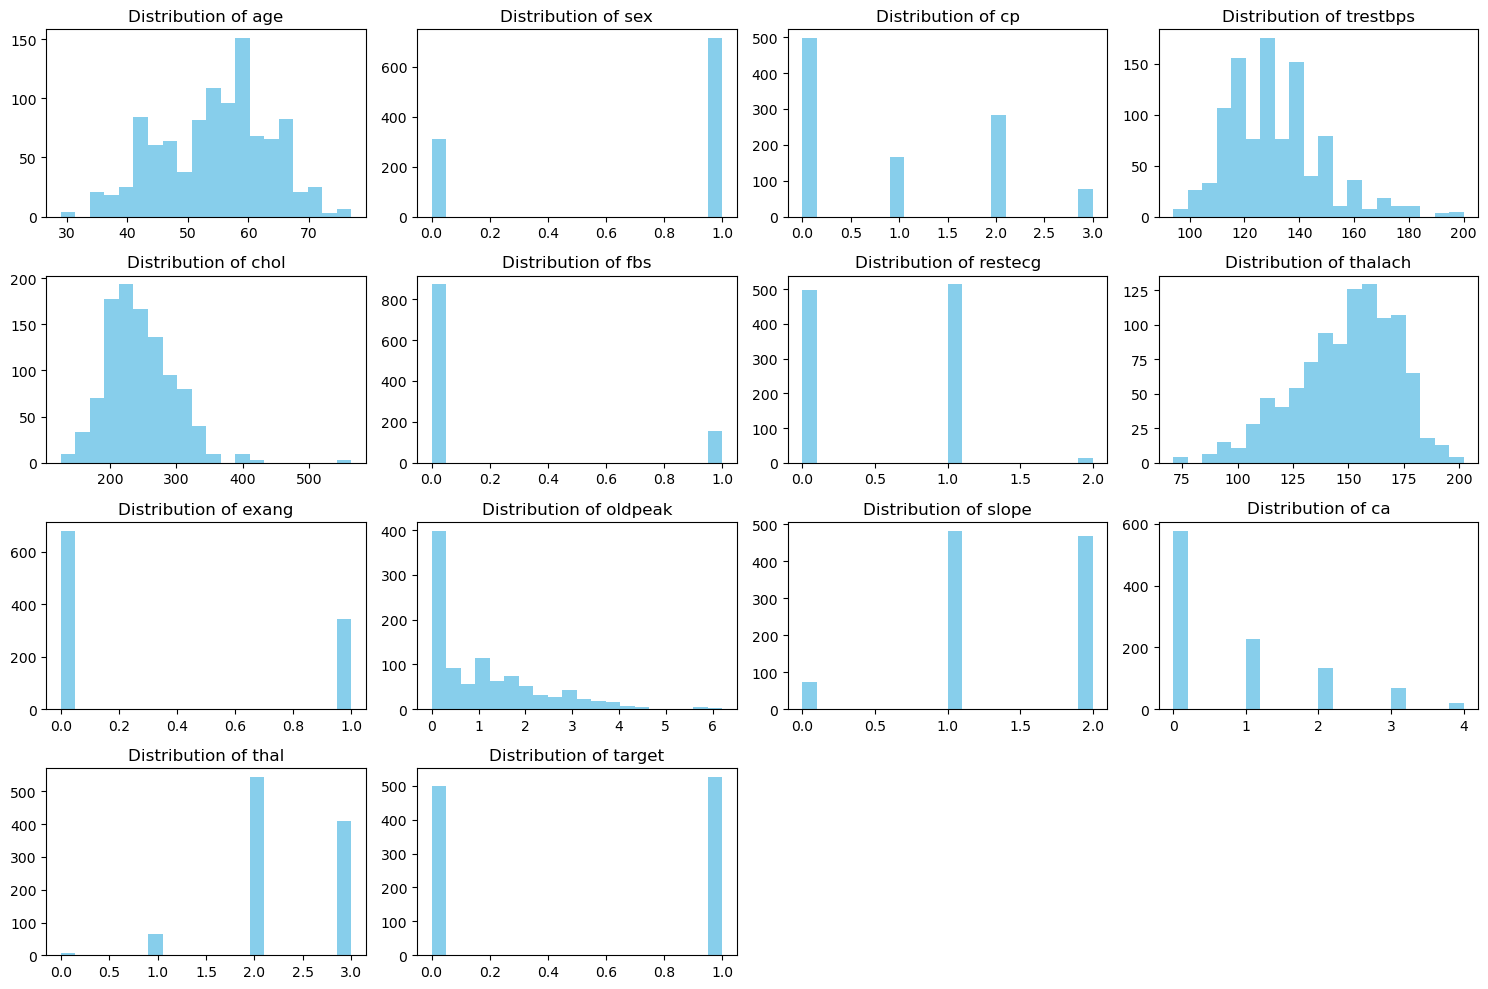

In [10]:
# Histogram of numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


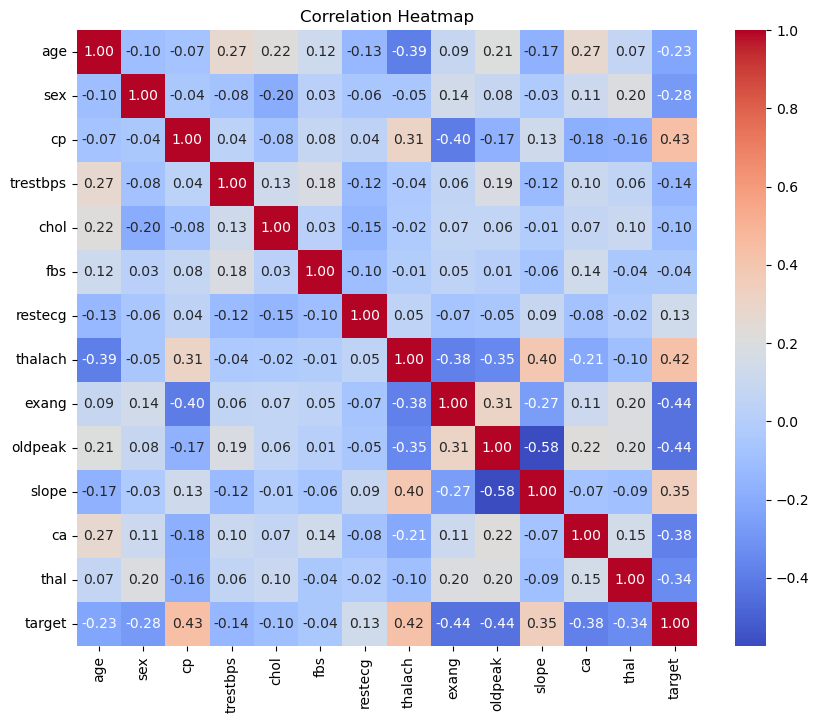

In [12]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


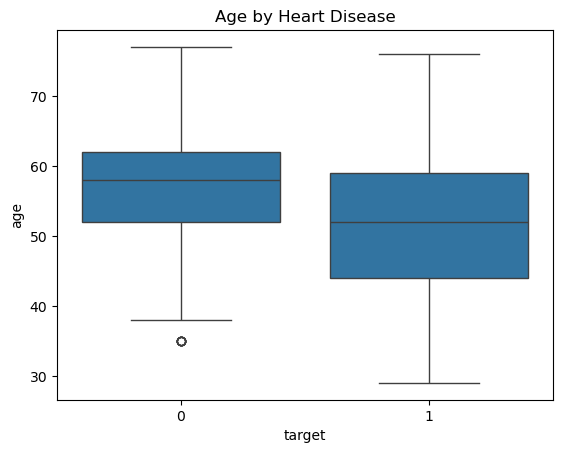

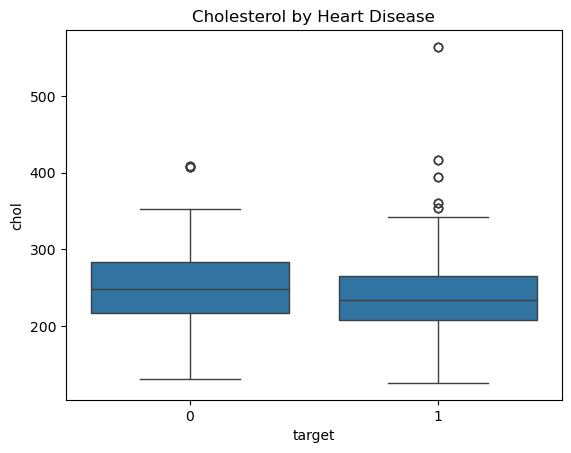

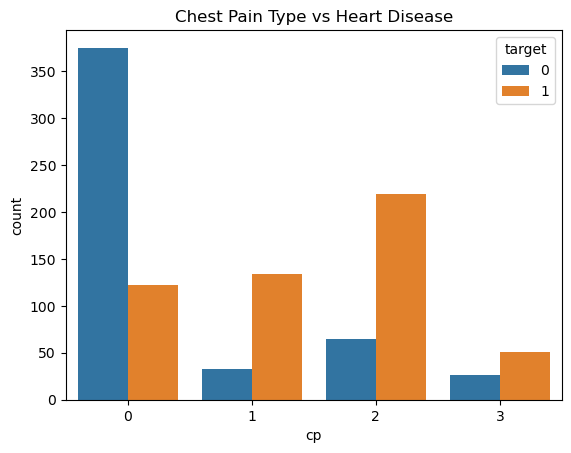

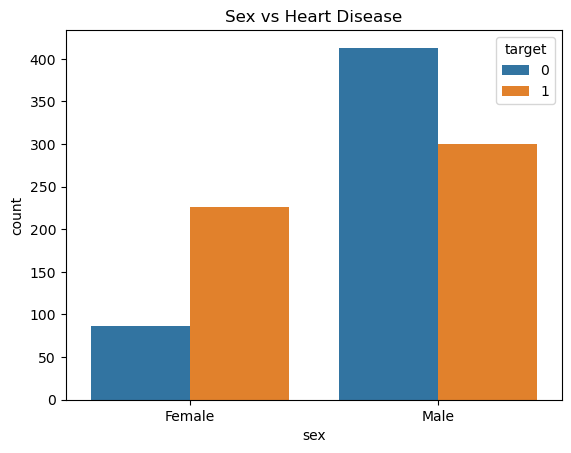

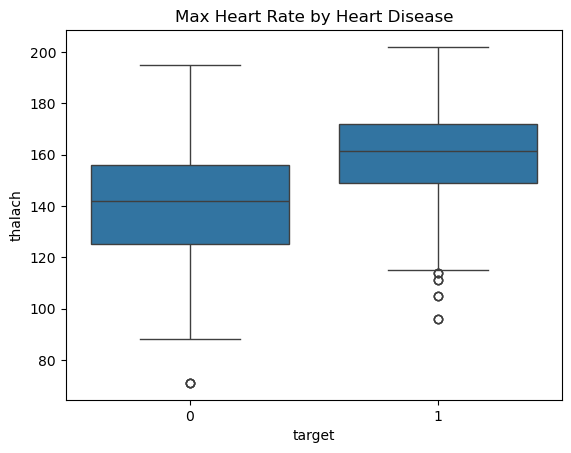

In [16]:
# Age by target
sns.boxplot(x='target', y='age', data=df)
plt.title('Age by Heart Disease')
plt.show()

# Cholesterol by target
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol by Heart Disease')
plt.show()

# Chest pain type vs target
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

# Sex vs target
sns.countplot(x='sex', hue='target', data=df)
plt.title('Sex vs Heart Disease')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

# Max heart rate
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate by Heart Disease')
plt.show()


##  EDA Summary

We observed the following from our analysis:

- **Chest pain type** shows a strong association with heart disease.
- **Maximum heart rate** tends to be higher in patients without heart disease.
- **Cholesterol** and **age** distributions vary across classes, although not drastically.
- The **correlation matrix** indicates some strong correlations among features such as chest pain type, thalach (max heart rate), and target (presence of disease).


##  Train-Test Split

In [49]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



We split the dataset into training and testing sets using an **80-20 ratio**.  
This means:

- **80%** of the data was used to train the model (`X_train`, `y_train`)
- **20%** was used to test the model’s performance on unseen data (`X_test`, `y_test`)

Using this split helps ensure the model generalizes well and avoids overfitting, while still giving enough data for training. The `random_state=42` ensures the results are reproducible.


##  Logistic Regression Model

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {round(accuracy*100, 2)}%")


Logistic Regression Accuracy: 79.51%


Confusion Matrix:
[[73 29]
 [13 90]]


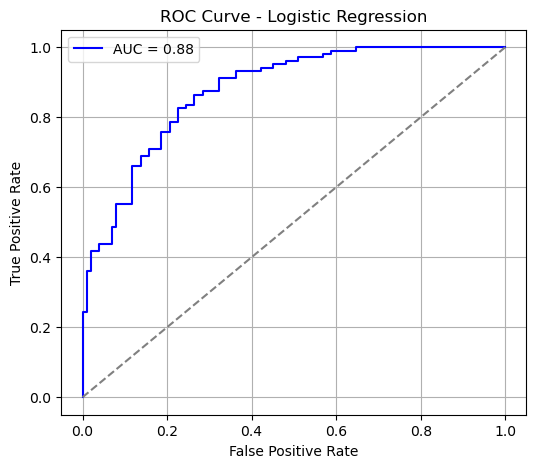

In [27]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


## Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {round(rf_acc * 100, 2)}%")

Random Forest Accuracy: 98.54%


## ROC Curve Comparison

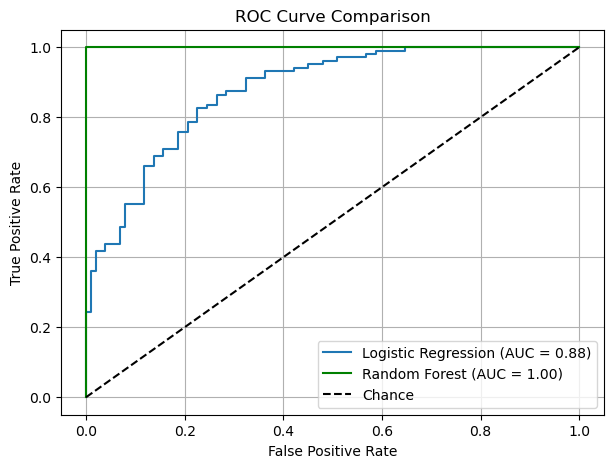

In [36]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %.2f)' % auc(fpr_log, tpr_log))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.2f)' % auc(fpr_rf, tpr_rf), color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Feature Importance - Random Forest

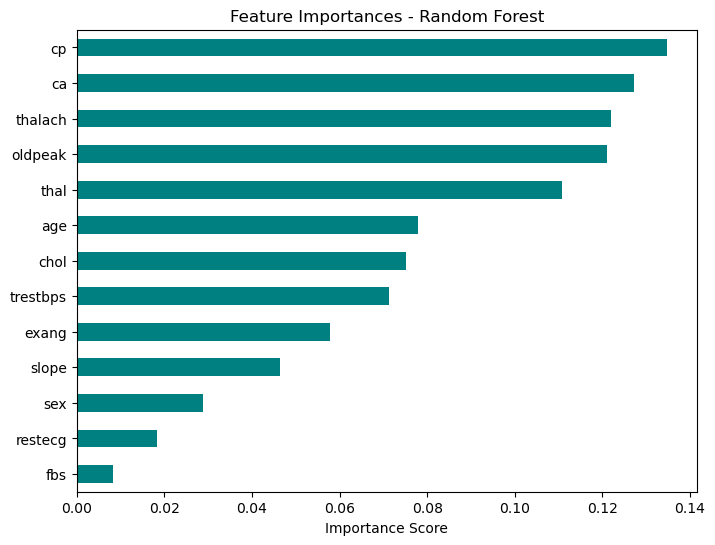

In [39]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6), color='teal')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.show()

## Model Summary

- **Logistic Regression Accuracy:** 79.51%
- **Random Forest Accuracy:** 98.54%

Random Forest outperforms Logistic Regression by a large margin. This is because it uses multiple decision trees to capture complex patterns and interactions between features, while Logistic Regression only learns linear relationships. This makes Random Forest much better for this kind of medical data, where feature effects are often non-linear.


## Conclusion

Using clinical and demographic data, we built models to predict the presence of heart disease. After comparing Logistic Regression and Random Forest, we found that Random Forest achieved **98.54% accuracy**, making it the most effective model.

It also highlights the most important contributing factors, helping doctors focus on key indicators such as chest pain type, number of vessels colored, and maximum heart rate. This kind of analysis can support faster and more accurate risk assessment for patients.

---


##  Dataset Citation

No official citation provided.  
**Source:** [Heart Disease Dataset on Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
